In [15]:
%load_ext autoreload
%autoreload 2
import os
import ujson
import multiprocessing as mp
import time
import cv2
import numpy as np
import matplotlib.pyplot as plt

from config import *
from openpose_helpers import *

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [ ]:
# Download openpose demo video into current directory
!wget https://github.com/CMU-Perceptual-Computing-Lab/openpose/raw/master/examples/media/video.avi

# Submit job to run openpose on this video + condense the outputs into one dataframe
run_openpose('video.avi', './openpose_test_outputs/', 
             condensed_output_dir='./openpose_test_condensed_outputs/', 
             keypoint_scale=3, condense=True)

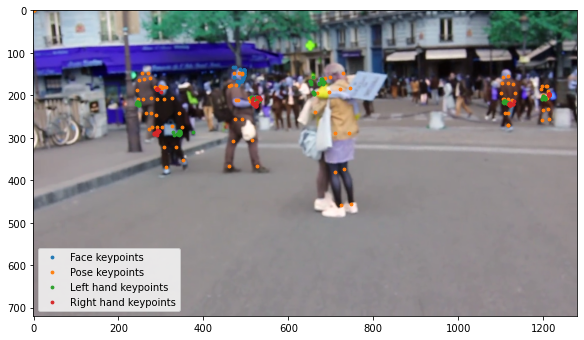

In [46]:
# 
def get_frame(vid_path, frame):
    cap = cv2.VideoCapture(vid_path)
    cap.set(cv2.CAP_PROP_POS_FRAMES, frame)
    return cap.read()[1]

def sanity_check_op_keypts(vid_path, vid_df_path, keypts_normalized=True):
    """
    Given a vid-level JSON, plot a random frame in the video containing openpose 
    keypoints to sanity-check that the openpose keypoints appear sensible.
    
    Arguments:
    vid_path    -- path to the video to sanity check
    vid_df_path -- path to the video's Openpose condensed 
                   JSON dataframe to sanity check
    keypts_normalized -- True if keypoints in Openpose outputs are normalized
    (i.e. x and y values in range [0, 1]), else False
    """
    df = pd.read_json(vid_df_path)
    openpose_npy = recover_npy(df)
    rand_frame = np.random.randint(0, len(df))
    img = get_frame(vid_path, rand_frame)
    plt.figure(figsize=(10, img.shape[0]/img.shape[1]*10))
    x_factor = img.shape[1] if keypts_normalized else 1
    y_factor = img.shape[0] if keypts_normalized else 1
    for person in openpose_npy[rand_frame]:
        plt.scatter(person[0, NPY_FACE_START:NPY_FACE_END]*x_factor, 
                    person[1, NPY_FACE_START:NPY_FACE_END]*y_factor, 
                    c='C0', s=8, label='Face keypoints')
        plt.scatter(person[0, NPY_POSE_START:NPY_POSE_END]*x_factor,  
                    person[1, NPY_POSE_START:NPY_POSE_END]*y_factor,  
                    c='C1', s=8, label='Pose keypoints')
        plt.scatter(person[0, NPY_HAND_LEFT_START:NPY_HAND_LEFT_END]*x_factor,   
                    person[1, NPY_HAND_LEFT_START:NPY_HAND_LEFT_END]*y_factor,   
                    c='C2', s=8, label='Left hand keypoints')
        plt.scatter(person[0, NPY_HAND_RIGHT_START:NPY_HAND_RIGHT_END]*x_factor,    
                    person[1, NPY_HAND_RIGHT_START:NPY_HAND_RIGHT_END]*y_factor,    
                    c='C3', s=8, label='Right hand keypoints')
    handles, labels = plt.gca().get_legend_handles_labels()
    by_label = dict(zip(labels, handles))
    plt.legend(by_label.values(), by_label.keys())    
    plt.imshow(img)
    
vid_df_path = './openpose_test_condensed_outputs/video.json'
vid_path = 'video.AVI'
sanity_check_op_keypts(vid_path, vid_df_path, keypts_normalized=True)

# OLD CELLS BELOW

# Openpose

#### Running Openpose

In [3]:
for face_val in [True, False]:
    for hand_val in [True, False]:
        test_vid = '/scratch/groups/mcfrank/Home_Headcam_new/Samcam/S_20130417_0600_01.mp4'
        output_location = '/scratch/users/agrawalk/headcam-test-outputs/'
        run_openpose(test_vid, output_location, face=face_val, hand=hand_val)

overwrite existing directory /scratch/users/agrawalk/headcam-test-outputs/S_20130417_0600_01? (yes/no) yes


command submitted to sbatch job:  singularity exec --nv $SINGULARITY_CACHEDIR/openpose-latest.img bash -c 'cd /openpose-master && ./build/examples/openpose/openpose.bin --video /scratch/groups/mcfrank/Home_Headcam_new/Samcam/S_20130417_0600_01.mp4 --face --hand --write_keypoint_json /scratch/users/agrawalk/headcam-test-outputs/S_20130417_0600_01'
command line output:  (b'Submitted batch job 186907\n', b'')


overwrite existing directory /scratch/users/agrawalk/headcam-test-outputs/S_20130417_0600_01? (yes/no) yes


command submitted to sbatch job:  singularity exec --nv $SINGULARITY_CACHEDIR/openpose-latest.img bash -c 'cd /openpose-master && ./build/examples/openpose/openpose.bin --video /scratch/groups/mcfrank/Home_Headcam_new/Samcam/S_20130417_0600_01.mp4 --face --write_keypoint_json /scratch/users/agrawalk/headcam-test-outputs/S_20130417_0600_01'
command line output:  (b'Submitted batch job 186911\n', b'')


overwrite existing directory /scratch/users/agrawalk/headcam-test-outputs/S_20130417_0600_01? (yes/no) yes


command submitted to sbatch job:  singularity exec --nv $SINGULARITY_CACHEDIR/openpose-latest.img bash -c 'cd /openpose-master && ./build/examples/openpose/openpose.bin --video /scratch/groups/mcfrank/Home_Headcam_new/Samcam/S_20130417_0600_01.mp4 --hand --write_keypoint_json /scratch/users/agrawalk/headcam-test-outputs/S_20130417_0600_01'
command line output:  (b'Submitted batch job 186912\n', b'')


overwrite existing directory /scratch/users/agrawalk/headcam-test-outputs/S_20130417_0600_01? (yes/no) yes


command submitted to sbatch job:  singularity exec --nv $SINGULARITY_CACHEDIR/openpose-latest.img bash -c 'cd /openpose-master && ./build/examples/openpose/openpose.bin --video /scratch/groups/mcfrank/Home_Headcam_new/Samcam/S_20130417_0600_01.mp4 --write_keypoint_json /scratch/users/agrawalk/headcam-test-outputs/S_20130417_0600_01'
command line output:  (b'Submitted batch job 186913\n', b'')


In [4]:
run_openpose(test_vid, output_location, keypoint_scale=3,
             face=True, hand=True)

overwrite existing directory /scratch/users/agrawalk/headcam-test-outputs/S_20130417_0600_01? (yes/no) yes


command submitted to sbatch job:  singularity exec --nv $SINGULARITY_CACHEDIR/openpose-latest.img bash -c 'cd /openpose-master && ./build/examples/openpose/openpose.bin --video /scratch/groups/mcfrank/Home_Headcam_new/Samcam/S_20130417_0600_01.mp4 --keypoint_scale 3 --face --hand --write_keypoint_json /scratch/users/agrawalk/headcam-test-outputs/S_20130417_0600_01'
command line output:  (b'Submitted batch job 187385\n', b'')


# Extracting face/hand information

#### Extracting face/hand presence

In [4]:
frame = json.load(open('/scratch/users/agrawalk/A_20130531_0818_01_000000000014_keypoints.json', 'r'))

print(frame)

{'version': 1.0, 'people': [{'pose_keypoints': [0, 0, 0, 0.365409, 0.626348, 0.352551, 0.426599, 0.653562, 0.27584, 0, 0, 0, 0, 0, 0, 0.304166, 0.601857, 0.307683, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.4348, 0.506518, 0.196167, 0.353127, 0.465578, 0.328009], 'face_keypoints': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 'hand_left_keypoints': [0, 0, 0, 0, 0

In [6]:
extract_face_hand_frame(frame) #Should be [0, 0]

[0.0, 0.0]

# Creating numpy arrays

In [ ]:
A_json_dir = '/scratch/users/agrawalk/'

In [7]:
for i in range(0, 16 + 1):
    kpt = f'A_20130531_0818_01_{str(i).zfill(12)}_keypoints.json'
    kpt = os.path.join('/scratch/users/agrawalk', kpt)
    print(json.load(open(kpt, 'r')))

{'version': 1.0, 'people': []}
{'version': 1.0, 'people': []}
{'version': 1.0, 'people': []}
{'version': 1.0, 'people': []}
{'version': 1.0, 'people': []}
{'version': 1.0, 'people': []}
{'version': 1.0, 'people': []}
{'version': 1.0, 'people': []}
{'version': 1.0, 'people': []}
{'version': 1.0, 'people': []}
{'version': 1.0, 'people': []}
{'version': 1.0, 'people': []}
{'version': 1.0, 'people': []}
{'version': 1.0, 'people': []}
{'version': 1.0, 'people': [{'pose_keypoints': [0, 0, 0, 0.365409, 0.626348, 0.352551, 0.426599, 0.653562, 0.27584, 0, 0, 0, 0, 0, 0, 0.304166, 0.601857, 0.307683, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.4348, 0.506518, 0.196167, 0.353127, 0.465578, 0.328009], 'face_keypoints': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

In [ ]:
def load_kpt(kpt):
    return json.load(open(kpt, 'r'))

def get_kpt(i):
    kpt = f'A_20130531_0818_01_{str(i).zfill(12)}_keypoints.json'
    kpt = os.path.join('/scratch/users/agrawalk', kpt)
    
    return kpt

In [ ]:
p = mp.Pool()
for kc in range(0, 5776 + 1):
    print(kc)
    print('mp: ')
    %time x = p.map(load_kpt, [get_kpt(i) for i in range(kc)])
    print('list comprehension: ')
    %time x = [load_kpt(get_kpt(i)) for i in range(kc)]

In [2]:
num_frames = 53798
vid_name = 'A_20130531_0818_01'
vid_dir = os.path.join('/scratch/groups/mcfrank/Home_Headcam/openpose_raw_json/',
                       vid_name) 
json_name = lambda i: f'{vid_name}_{str(i).zfill(12)}_keypoints.json'
fps = [os.path.join(vid_dir,
                    json_name(i))
       for i in range(0, num_frames)]



In [3]:
fps = get_json_filepaths('A_20130531_0818_02', 53699)

In [4]:
len(fps)

53699

In [5]:
fps[0] # First frame

'/scratch/groups/mcfrank/Home_Headcam/openpose_raw_json/A_20130531_0818_02/A_20130531_0818_02_000000000000_keypoints.json'

In [6]:
fps[-1] # Last frame

'/scratch/groups/mcfrank/Home_Headcam/openpose_raw_json/A_20130531_0818_02/A_20130531_0818_02_000000053698_keypoints.json'

In [7]:
ujson.load(open(fps[-1], 'r')) # make sure it opens

{'version': 1.0,
 'people': [{'pose_keypoints': [0.365352,
    0.509103,
    0.856448,
    0.363347,
    0.656283,
    0.55122,
    0.206157,
    0.629048,
    0.474401,
    0.0775459,
    0.898538,
    0.484854,
    0.100037,
    0.993968,
    0.0751131,
    0.522569,
    0.667157,
    0.432315,
    0.569471,
    0.972197,
    0.382493,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0.33477,
    0.460154,
    0.848104,
    0.412284,
    0.465664,
    0.863463,
    0.293951,
    0.481986,
    0.521948,
    0.465331,
    0.490219,
    0.809701],
   'face_keypoints': [0.298912,
    0.468218,
    0.411581,
    0.294583,
    0.503831,
    0.462257,
    0.296747,
    0.540406,
    0.345433,
    0.301076,
    0.576982,
    0.258564,
    0.305406,
    0.612595,
    0.22672,
    0.310456,
    0.63762,
    0.0990371,
    0.334987,
    0.666495,
    0.0637365,
    0.351582,
    0.576019,
    0

In [8]:
# Loads them as a list of dicts

json_list = load_json_list(fps)

loading json files...
0/53699
10000/53699
20000/53699
30000/53699
40000/53699
50000/53699
done loading json files.


In [9]:
json_list[290]

{'version': 1.0,
 'people': [{'pose_keypoints': [0.204093,
    0.495603,
    0.250148,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0.173504,
    0.479206,
    0.270866,
    0.218373,
    0.457491,
    0.319191,
    0.157169,
    0.509274,
    0.0832596,
    0.251084,
    0.465621,
    0.0763495],
   'face_keypoints': [0.225121,
    0.449662,
    0.0030224,
    0.225121,
    0.449662,
    0.000226664,
    0.22123,
    0.449662,
    7.64505e-05,
    0.225121,
    0.449662,
    7.83936e-05,
    0.240685,
    0.442395,
    0.00066436,
    0.240685,
    0.442395,
    0.00106986,
    0.240685,
    0.442395,
    6.97412e-05,
    0.240685,
    0.442395,
    1.22507e-05,
    0.240685,
    0.442395,
    5.67875e-05,
    0.225121,
    0.449662,
    -2.64377e-05,
    0

In [10]:
len(json_list)

53699

In [11]:
max(len(frame['people']) for frame in json_list)

5

In [12]:
npy = json_list_to_npy(json_list)

In [13]:
npy.shape

(53699, 5, 3, 130)

In [27]:
# Take a person's keypoints and ensure sameness across json/npy
person = json_list[290]['people'][0]
print('JSON:')
print(person['pose_keypoints'])

person_npy = npy[290][0]
print('Numpy:')
print(person_npy.shape)
person_npy[:, 
           NPY_POSE_START:
           NPY_POSE_END]

JSON:
[0.204093, 0.495603, 0.250148, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.173504, 0.479206, 0.270866, 0.218373, 0.457491, 0.319191, 0.157169, 0.509274, 0.0832596, 0.251084, 0.465621, 0.0763495]
Numpy:
(3, 130)


array([[0.204093 , 0.       , 0.       , 0.       , 0.       , 0.       ,
        0.       , 0.       , 0.       , 0.       , 0.       , 0.       ,
        0.       , 0.       , 0.173504 , 0.218373 , 0.157169 , 0.251084 ],
       [0.495603 , 0.       , 0.       , 0.       , 0.       , 0.       ,
        0.       , 0.       , 0.       , 0.       , 0.       , 0.       ,
        0.       , 0.       , 0.479206 , 0.457491 , 0.509274 , 0.465621 ],
       [0.250148 , 0.       , 0.       , 0.       , 0.       , 0.       ,
        0.       , 0.       , 0.       , 0.       , 0.       , 0.       ,
        0.       , 0.       , 0.270866 , 0.319191 , 0.0832596, 0.0763495]])

In [28]:
person = json_list[290]['people'][0]
print('JSON:')
print(person['face_keypoints'])

person_npy = npy[290][0]
print('Numpy:')
print(person_npy.shape)
person_npy[:, 
           NPY_FACE_START:
           NPY_FACE_END]

JSON:
[0.225121, 0.449662, 0.0030224, 0.225121, 0.449662, 0.000226664, 0.22123, 0.449662, 7.64505e-05, 0.225121, 0.449662, 7.83936e-05, 0.240685, 0.442395, 0.00066436, 0.240685, 0.442395, 0.00106986, 0.240685, 0.442395, 6.97412e-05, 0.240685, 0.442395, 1.22507e-05, 0.240685, 0.442395, 5.67875e-05, 0.225121, 0.449662, -2.64377e-05, 0.240685, 0.442395, 0.00011626, 0.262865, 0.562821, 9.65988e-05, 0.262865, 0.562821, 0.000118248, 0.262865, 0.562821, 7.79079e-05, 0.262865, 0.562821, 7.41269e-05, 0.262865, 0.562821, 0.000134115, 0.262865, 0.562821, 0.00013393, 0.225121, 0.449662, 8.96352e-05, 0.262865, 0.562821, 4.40859e-05, 0.262865, 0.562821, 0.000122458, 0.240685, 0.442395, 1.68701e-05, 0.262865, 0.562821, -1.88164e-05, 0.262865, 0.562821, -8.71148e-05, 0.258584, 0.562821, -0.000117935, 0.262865, 0.562821, -5.87432e-05, 0.262865, 0.562821, -0.000173952, 0.22123, 0.449662, -1.25975e-05, 0.262865, 0.562821, 0.0018769, 0.262865, 0.562821, 0.00125556, 0.262865, 0.562821, 0.000208658, 0.26286

array([[ 2.25121e-01,  2.25121e-01,  2.21230e-01,  2.25121e-01,
         2.40685e-01,  2.40685e-01,  2.40685e-01,  2.40685e-01,
         2.40685e-01,  2.25121e-01,  2.40685e-01,  2.62865e-01,
         2.62865e-01,  2.62865e-01,  2.62865e-01,  2.62865e-01,
         2.62865e-01,  2.25121e-01,  2.62865e-01,  2.62865e-01,
         2.40685e-01,  2.62865e-01,  2.62865e-01,  2.58584e-01,
         2.62865e-01,  2.62865e-01,  2.21230e-01,  2.62865e-01,
         2.62865e-01,  2.62865e-01,  2.62865e-01,  2.62865e-01,
         2.40685e-01,  2.62865e-01,  2.62865e-01,  2.62865e-01,
         2.25121e-01,  2.62865e-01,  2.62865e-01,  2.62865e-01,
         2.62865e-01,  2.62865e-01,  2.62865e-01,  2.62865e-01,
         2.62865e-01,  2.62865e-01,  2.62865e-01,  2.62865e-01,
         2.62865e-01,  2.62865e-01,  2.40685e-01,  2.62865e-01,
         2.62865e-01,  2.62865e-01,  2.62865e-01,  2.62865e-01,
         2.40685e-01,  2.40685e-01,  2.40685e-01,  2.62865e-01,
         2.40685e-01,  2.40685e-01,  2.4

In [26]:
person = json_list[290]['people'][0]
print('JSON:')
print(person['hand_left_keypoints'])

person_npy = npy[290][0]
print('Numpy:')
print(person_npy.shape)
person_npy[:, 
           NPY_HAND_LEFT_START:
           NPY_HAND_LEFT_END]

JSON:
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Numpy:
(3, 130)


array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0.]])

In [5]:
sum([True, True, False])

2

## Sanity checking Openpose numpy keypoints on corresponding frame